In [36]:
import pandas as pd
import numpy as np 
from pandas_datareader import data
from func_pyeconomics import graf_plotly
import plotly.express as px 
import matplotlib.pyplot as plt

In [27]:
ativos = ['ITSA4.SA','IRBR3.SA','MGLU3.SA', '^BVSP']

In [28]:
ativos

['ITSA4.SA', 'IRBR3.SA', 'MGLU3.SA', '^BVSP']

### Normalização da carteira

In [29]:
def gera_carteira(ativos,ano_inicio):
    lista_ativos = ativos
    dataframe = pd.DataFrame()
 
    for i in lista_ativos:
        frame = data.DataReader(i, data_source='yahoo', start=f'{ano_inicio}-01-01')
        frame = frame['Adj Close']
        frame = pd.DataFrame(frame)
        frame = frame.rename(columns={'Adj Close':f'{i}'})
        dataframe = pd.concat([frame, dataframe], axis = 1)
    return dataframe

In [30]:
def normaliza_carteira(dataframe):
    df_normalizado = pd.DataFrame()
    for i in dataframe.columns:
        df_normalizado[i] = dataframe[i] / dataframe[i][0]
    return df_normalizado

In [31]:
teste = gera_carteira(ativos,2010).dropna()
teste

,^BVSP,MGLU3.SA,IRBR3.SA,ITSA4.SA
Date,,,,
2017-07-31,65920.0,1.375504,8.329202,6.754799
2017-08-01,66516.0,1.388513,8.360481,6.973874
2017-08-02,67136.0,1.394249,8.374700,7.054200
2017-08-03,66777.0,1.396348,8.343420,7.039596
2017-08-04,66898.0,1.473432,8.104548,7.017686
...,...,...,...,...
2021-04-26,120595.0,21.709999,6.430000,10.226729
2021-04-27,119388.0,20.950001,6.270000,10.007656
2021-04-28,121053.0,20.650000,6.250000,10.378186


In [32]:
df_norm = normaliza_carteira(teste)
df_norm

,^BVSP,MGLU3.SA,IRBR3.SA,ITSA4.SA
Date,,,,
2017-07-31,1.000000,1.000000,1.000000,1.000000
2017-08-01,1.009041,1.009458,1.003755,1.032432
2017-08-02,1.018447,1.013628,1.005462,1.044324
2017-08-03,1.013001,1.015154,1.001707,1.042162
2017-08-04,1.014836,1.071195,0.973028,1.038919
...,...,...,...,...
2021-04-26,1.829414,15.783307,0.771983,1.513995
2021-04-27,1.811104,15.230784,0.752773,1.481562
2021-04-28,1.836362,15.012681,0.750372,1.536417


In [76]:
retorno_ativos = (df_norm/(df_norm.shift(1) - 1)).dropna()
retorno_ativos = retorno_ativos[1:]
retorno_ativos

,^BVSP,MGLU3.SA,IRBR3.SA,ITSA4.SA
Date,,,,
2017-08-02,112.644295,107.176143,267.737096,32.199973
2017-08-03,54.915296,74.489631,183.380355,23.512243
2017-08-04,78.060677,70.686191,570.007043,24.641037
2017-08-07,69.468303,15.313998,-36.139103,27.277983
2017-08-08,33.613366,11.907587,-38.040357,17.245632
...,...,...,...,...
2021-04-26,2.208295,1.066595,-3.298786,2.903903
2021-04-27,2.183594,1.030269,-3.301387,2.882447
2021-04-28,2.264027,1.054944,-3.035157,3.190483


In [77]:
var = retorno_ativos['MGLU3.SA'].var()
var

24.83699702622192

In [64]:

for i in retorno_ativos.columns:
    variancia = retorno_ativos[f'{i}'].var()
variancia

nan

In [33]:
benchmark = pd.DataFrame(df_norm['^BVSP'])
carteira = df_norm.drop(columns='^BVSP')
carteira['CARTEIRA'] = carteira.sum(axis=1) / len(carteira.columns)
carteira = pd.DataFrame(carteira['CARTEIRA'])
cart_bench = pd.concat([carteira, benchmark], axis = 1)

In [34]:

correlacao = df_norm.corr()
correlacao

,^BVSP,MGLU3.SA,IRBR3.SA,ITSA4.SA
^BVSP,1.000000,0.724140,0.290137,0.770728
MGLU3.SA,0.724140,1.000000,-0.317021,0.207493
IRBR3.SA,0.290137,-0.317021,1.000000,0.734021
ITSA4.SA,0.770728,0.207493,0.734021,1.000000


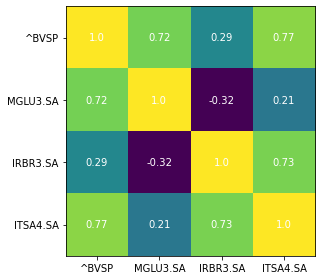

In [55]:
fig, ax = plt.subplots()
im = ax.imshow(correlacao.values)
ax.set_xticks(range(len(correlacao)))
ax.set_yticks(range(len(correlacao)))
ax.set_xticklabels(correlacao.columns, size=10)
ax.set_yticklabels(correlacao.columns)
for i in range(len(correlacao)):
    for j in range(len(correlacao)):
        text = ax.text(j, i, round(correlacao.values[i, j],2),
                    ha="center", va="center", color="w")
fig.tight_layout()
plt.show()